In [1]:
# author: Fahim Tajwar

from project_code.label_loader import *
from project_code.image_loader import *
from project_code.util import *
from project_code.models import *
from project_code.model_trainer import *
from project_code.dataset import *

In [2]:
file_name_1 = '/Users/fahimtajwar/Academics/cs231/labels_cells_only.xlsx'
file_name_2 = '/Users/fahimtajwar/Academics/cs231/classes_800.xlsx'
file_names = [file_name_1, file_name_2]

label_reader = Label_Reader(file_names)
weight_vector = label_reader.get_weight_vector()
print(label_reader.get_all_labels())
print(label_reader.get_label_to_label_id_map())
print(weight_vector)

{'cell dies', 'grows sparse', 'grows dense'}
{'cell dies': 0, 'grows sparse': 1, 'grows dense': 2}
tensor([0.0260, 0.0097, 0.0294])


In [3]:
num_classes = len(label_reader.get_all_labels())
print("Number of classes : ",  num_classes)

Number of classes :  3


In [4]:
prefix = "/Users/fahimtajwar/Academics/cs231/project_data_well_2/well2_data/well"
suffix = "_well.png"

all_well_ids = label_reader.get_all_well_ids()
si = Single_Image_Loader(5, all_well_ids, prefix, suffix)
tensor = si.get_image_tensor()
well_id_to_image_id_map = si.get_well_to_image_id_map()
print(tensor.shape)
print(well_id_to_image_id_map)

torch.Size([351, 3, 224, 224])
{1004: 0, 1006: 1, 1015: 2, 1016: 3, 1018: 4, 1019: 5, 1023: 6, 1027: 7, 1036: 8, 1037: 9, 1046: 10, 1055: 11, 1060: 12, 1062: 13, 1063: 14, 1064: 15, 1078: 16, 1086: 17, 1091: 18, 1098: 19, 1100: 20, 1111: 21, 1122: 22, 1125: 23, 1130: 24, 1134: 25, 1141: 26, 1142: 27, 1146: 28, 1153: 29, 1171: 30, 1175: 31, 1176: 32, 1187: 33, 1194: 34, 1233: 35, 1242: 36, 1254: 37, 1265: 38, 1303: 39, 1324: 40, 1327: 41, 1337: 42, 1389: 43, 1416: 44, 1432: 45, 1457: 46, 1460: 47, 1476: 48, 1480: 49, 1516: 50, 1520: 51, 1524: 52, 1569: 53, 1591: 54, 1600: 55, 1607: 56, 1608: 57, 1611: 58, 1614: 59, 1622: 60, 1644: 61, 1646: 62, 1667: 63, 1672: 64, 1679: 65, 1685: 66, 1689: 67, 1693: 68, 1714: 69, 1719: 70, 1733: 71, 1736: 72, 1739: 73, 1754: 74, 1770: 75, 1771: 76, 1772: 77, 1775: 78, 1779: 79, 1784: 80, 1785: 81, 1786: 82, 1791: 83, 1794: 84, 1801: 85, 1804: 86, 1806: 87, 1807: 88, 1811: 89, 1812: 90, 1813: 91, 1815: 92, 1819: 93, 1824: 94, 1825: 95, 1828: 96, 1829: 97

In [5]:
input_size = 3 * 224 * 224
num_classes = 3

label_to_label_id = label_reader.label_to_label_id
label_id_to_label_map = label_reader.get_label_id_to_label_map()
#print(label_id_to_label_map)

Y_label = label_reader.get_label_map()
for key in Y_label:
    Y_label[key] = label_to_label_id[Y_label[key]]

#print(Y_label)

label_id_train, label_id_val, label_id_test = get_dataset_split(Y_label)
print(len(label_id_train))
print(label_id_train)
print(len(label_id_val))
print(len(label_id_train))

280
[1130 2346   67 2199 1125 1416   68 1689 2101 2920 2299 2891  159  418
 2351  753  738  522 1480 1848 1891 1194 1060  683 1611  201  153 2231
 1100 2666 2361 1815 2862 2569  614 2134  278  325 1015 1825 1693  257
 1153 2693 1064 1607 2579  525 1063 1600 2291  561  169 1775 2179 1876
 1018  355 1849 2839  100 2344 1931 1006 2870 2193  434 1023  419 1739
 1254 2285  579   17  548 2832 1794 1806 1791 2040 1644 2972  412  371
 2991 1055 2751 1838  242 2640 1992 1962 1893 1807  635  767   62 1004
 1906 1913 1679  360 1460 2278 2099 2414 2853  564 1141 1524  307 1812
  572 2215 1785 1770 1857  202 1303 1146  272  399  197 1078 2820  374
 2227 2228 2406 1171 1646 1811 1714 2337 1945  499 2082   29 2847  593
  134  723 2438 2662  387 1993 1591 2881   96 1983 1111  389   42 1934
 2955 1062  206 2684 1324 2393 2417 2137   91 1859 1828 1327 2986 1622
 1719 1046  608  785 1947 2971 1516 1019 1958  702  518 2543 1784 1772
  136 2011 1819  483 2342  292 1831 1016  451 1685  286   54  317 2111
  

In [6]:
training_set = Augmented_Dataset(tensor, label_id_train, Y_label, well_id_to_image_id_map, 
                                 final_transformation_choice)
validation_set = Augmented_Dataset(tensor, label_id_val, Y_label, well_id_to_image_id_map, transform_normalization)
test_set = Augmented_Dataset(tensor, label_id_test, Y_label, well_id_to_image_id_map, transform_normalization)

In [7]:
training_batch_size = 320
validation_batch_size = 1
test_batch_size = 1
learning_rate = 0.0001

validation_loader = torch.utils.data.DataLoader(dataset = validation_set, 
                                          batch_size = validation_batch_size, 
                                          shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_set, 
                                          batch_size = test_batch_size, 
                                          shuffle = False)

In [8]:
conv_net = SimpleConvNet()
conv_net_model = Model(conv_net, training_set, training_batch_size, learning_rate, label_id_to_label_map, 
              weight = weight_vector, imbalanced_class = True, num_epochs = 30, verbose = True)

Epoch: [1/30], Loss: 1.0986
Epoch: [2/30], Loss: 1.0864
Epoch: [3/30], Loss: 1.0990
Epoch: [4/30], Loss: 1.1155
Epoch: [5/30], Loss: 1.0809
Epoch: [6/30], Loss: 1.0876
Epoch: [7/30], Loss: 1.0814
Epoch: [8/30], Loss: 1.0657
Epoch: [9/30], Loss: 1.0788
Epoch: [10/30], Loss: 1.0669
Epoch: [11/30], Loss: 1.0566
Epoch: [12/30], Loss: 1.0615
Epoch: [13/30], Loss: 1.0462
Epoch: [14/30], Loss: 1.0590
Epoch: [15/30], Loss: 1.0323
Epoch: [16/30], Loss: 1.0343
Epoch: [17/30], Loss: 1.0301
Epoch: [18/30], Loss: 1.0274
Epoch: [19/30], Loss: 1.0404
Epoch: [20/30], Loss: 1.0231
Epoch: [21/30], Loss: 1.0200
Epoch: [22/30], Loss: 1.0199
Epoch: [23/30], Loss: 1.0251
Epoch: [24/30], Loss: 1.0299
Epoch: [25/30], Loss: 1.0161
Epoch: [26/30], Loss: 1.0243
Epoch: [27/30], Loss: 1.0216
Epoch: [28/30], Loss: 1.0179
Epoch: [29/30], Loss: 1.0046
Epoch: [30/30], Loss: 1.0004
Training done!


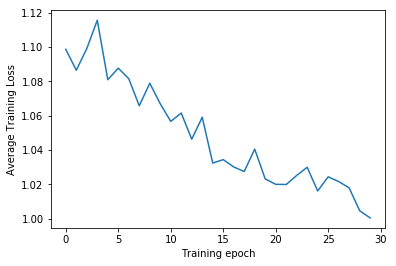

accuracy : 52.000000

Frequency per class:  {'grows sparse': 169, 'grows dense': 51, 'cell dies': 60}


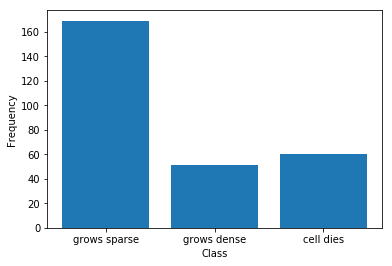

Number of datapoints we got correct per class {'grows sparse': 99, 'grows dense': 18, 'cell dies': 31}
Accuracy per class {'grows sparse': 0.5857988165680473, 'grows dense': 0.35294117647058826, 'cell dies': 0.5166666666666667}


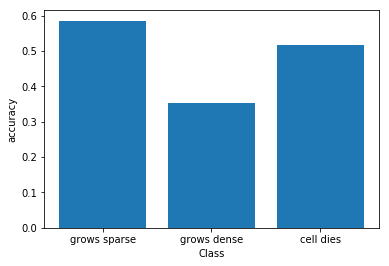

0.10682213713887924

In [9]:
conv_net_model.train()

accuracy : 42.000000

Frequency per class:  {'cell dies': 9, 'grows sparse': 20, 'grows dense': 6}


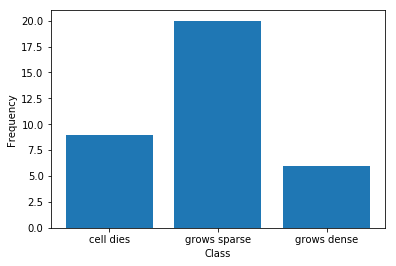

Number of datapoints we got correct per class {'cell dies': 2, 'grows sparse': 11, 'grows dense': 2}
Accuracy per class {'cell dies': 0.2222222222222222, 'grows sparse': 0.55, 'grows dense': 0.3333333333333333}


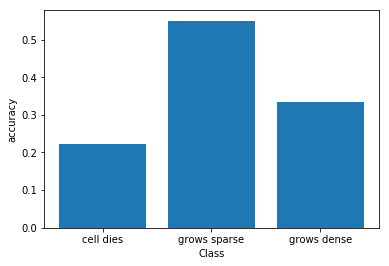

0.040740740740740744

In [10]:
conv_net_model.test(validation_loader)

accuracy : 65.000000

Frequency per class:  {'grows dense': 7, 'grows sparse': 24, 'cell dies': 4}


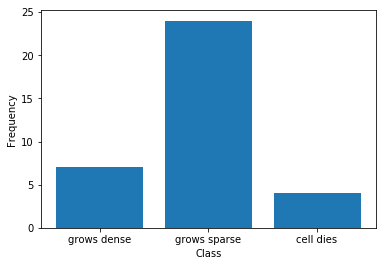

Number of datapoints we got correct per class {'grows dense': 1, 'grows sparse': 20, 'cell dies': 2}
Accuracy per class {'grows dense': 0.14285714285714285, 'grows sparse': 0.8333333333333334, 'cell dies': 0.5}


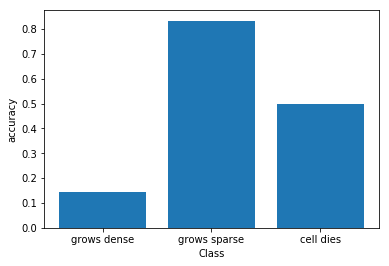

0.05952380952380952

In [11]:
conv_net_model.test(test_loader)